In [3]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [4]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1b

### SVD computation

In [6]:
matrices = {"M1": M1, "M2": M2, "M3": M3, "M4": M4, "M5": M5, "M6": M6}

for name, matrix in matrices.items():
    # Compute the SVD
    U, s, Vt = np.linalg.svd(matrix)
    S = np.diag(s)
    V = Vt.T
    
    # Display results
    print("="*50)
    print(f"SVD Results for Matrix {name}:")
    print("="*50)
    
    print(f"Matrix {name}:")
    print(matrix)
    print("\nU (Left singular vectors):")
    print(U)
    print("\nSingular values (Diagonal elements of S):")
    print(s)
    print("\nVt (Right singular vectors):")
    print(V)
    print("\n")


SVD Results for Matrix M1:
Matrix M1:
[[1 1 1 0 0]
 [1 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

U (Left singular vectors):
[[-5.77350269e-01  8.16496581e-01 -1.57496771e-16  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01 -7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01  7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]]

Singular values (Diagonal elements of S):
[3.00000000e+00 2.55806258e-17 2.11125548e-48 0.00000000e+00
 0.00000000e+00]

Vt (Right singular vectors):
[[-0.57735027  0.81649658  0.          0.          0.        ]
 [-0.57735027 -0.40824829 -0.70710678  0.          0.        ]
 [-0.57735027 -0.40824829  0.70710678  0.          0.        ]
 [-0.          0.          0.          0.          1.        ]
 [-0.          0.          0.          

## 1c

### Compute and plot the best rank-1 approximation for each matrix

Rank-1 Approximation:


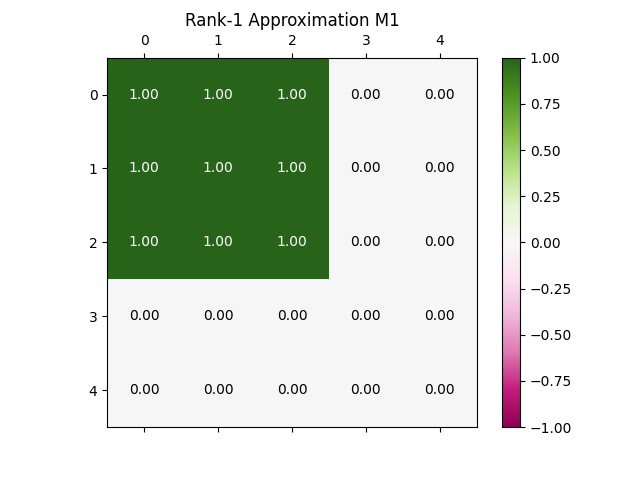

Rank-1 Approximation:


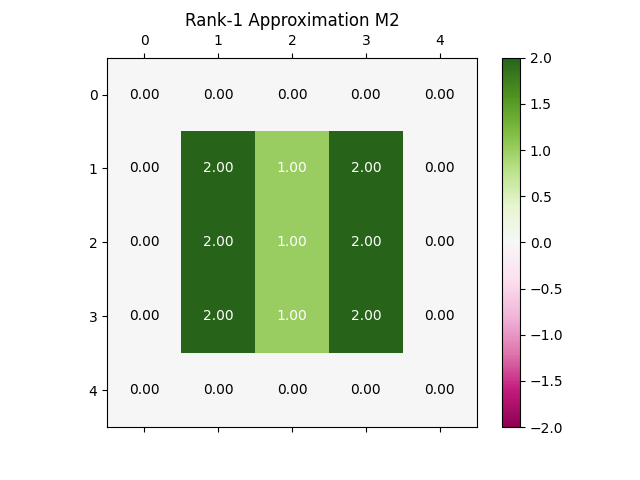

Rank-1 Approximation:


/Users/artembislyuk/Desktop/IE675b-machine-learning/Assignment 3/util.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # this creates a new plot


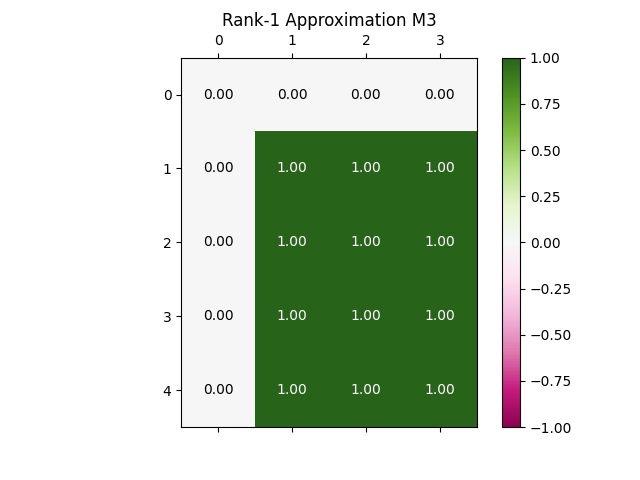

Rank-1 Approximation:


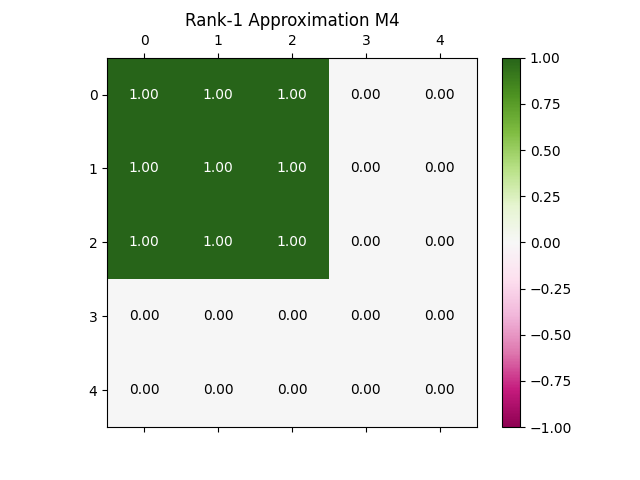

Rank-1 Approximation:


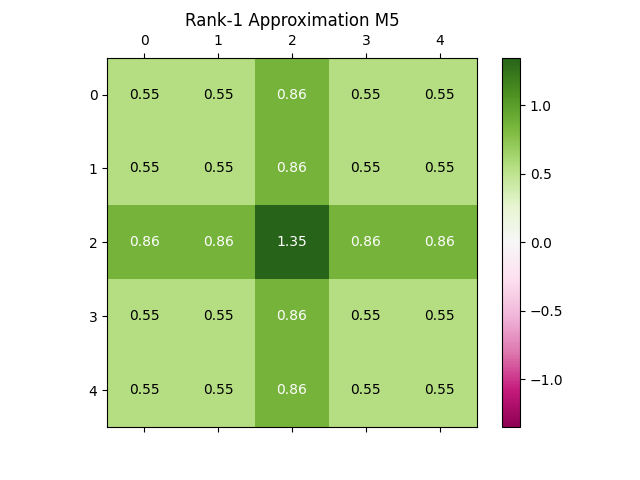

Rank-1 Approximation:


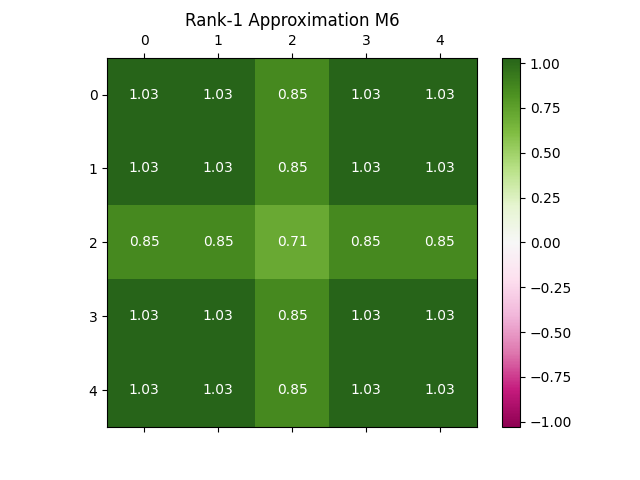

In [ ]:
for name, matrix in matrices.items():

    rank_1_approx = svdcomp(matrix, components=range(1))
    
    print("Rank-1 Approximation:")
    plot_matrix(rank_1_approx, labels="{:.2f}")
    plt.title(f"Rank-1 Approximation {name}")
    plt.show()


## 1d

### Rank & Non-zero singular values

In [10]:
print("Matrix M6:")
print(M6)

Matrix M6:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 0 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [11]:
_ , s, _ = np.linalg.svd(M6)
print("\nSingular values of M6:")
print(s)


Singular values of M6:
[4.82842712e+00 8.28427125e-01 9.95090019e-17 2.18529703e-17
 5.31822283e-50]


In [12]:
threshold = 1e-9
non_zero_singular_values = np.sum(s > threshold)
print(f"\nNumber of non-zero singular values (based on threshold): {non_zero_singular_values}")


Number of non-zero singular values (based on threshold): 2


In [13]:
computed_rank = np.linalg.matrix_rank(M6)
print(f"Rank of M6 (reported by matrix_rank): {computed_rank}")

Rank of M6 (reported by matrix_rank): 2


# 2 The SVD on Weather Data

In [ ]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

In [ ]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [ ]:
# YOUR PART
# Normalize the data to z-scores. Store the result in X.

In [ ]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

## 2b

In [ ]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART

## 2c

In [ ]:
# Here is an example plot.
plot_xy(lon, lat, U[:, 0])

In [ ]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

## 2d

In [ ]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))

## 2e

In [ ]:
# 2e(i) Guttman-Kaiser
# YOUR PART

In [ ]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART

In [ ]:
# 2e(iv) entropy
# YOUR PART

In [ ]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART

## 2f

In [ ]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART
nextplot()
plt.plot()
plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")

# 3 SVD and k-means

In [ ]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

In [ ]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

In [ ]:
# YOUR PART HERE

## 3c

In [ ]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE

In [ ]:
# cluster and visualize
Z_clusters = KMeans(5).fit(Z).labels_
# match clusters as well as possible (try without)
Z_clusters = match_categories(X_clusters, Z_clusters)
nextplot()
axs = plt.gcf().subplots(1, 2)
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={k}$)")